In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [55]:
data=pd.read_csv('telecom_churn.csv')
data.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


In [57]:
data.isna().sum()

customer_id             0
telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
dtype: int64

In [58]:
data.isnull().sum()

customer_id             0
telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
dtype: int64

In [59]:
data.dropna(inplace=True)

In [60]:
data.duplicated().sum()

0

In [61]:
data.drop_duplicates(inplace=True)

In [62]:
data.columns

Index(['customer_id', 'telecom_partner', 'gender', 'age', 'state', 'city',
       'pincode', 'date_of_registration', 'num_dependents', 'estimated_salary',
       'calls_made', 'sms_sent', 'data_used', 'churn'],
      dtype='object')

In [63]:
data.drop(['customer_id','state','city','pincode','telecom_partner','date_of_registration'],inplace=True,axis=1)

In [64]:
data.head()

,gender,age,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,F,25,4,124962,44,45,-361,0
1,F,55,2,130556,62,39,5973,0
2,F,57,0,148828,49,24,193,1
3,M,46,1,38722,80,25,9377,1
4,F,26,2,55098,78,15,1393,0


In [65]:
le=LabelEncoder()
data['gender']=le.fit_transform(data['gender'])

In [66]:
data.head()

,gender,age,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,0,25,4,124962,44,45,-361,0
1,0,55,2,130556,62,39,5973,0
2,0,57,0,148828,49,24,193,1
3,1,46,1,38722,80,25,9377,1
4,0,26,2,55098,78,15,1393,0


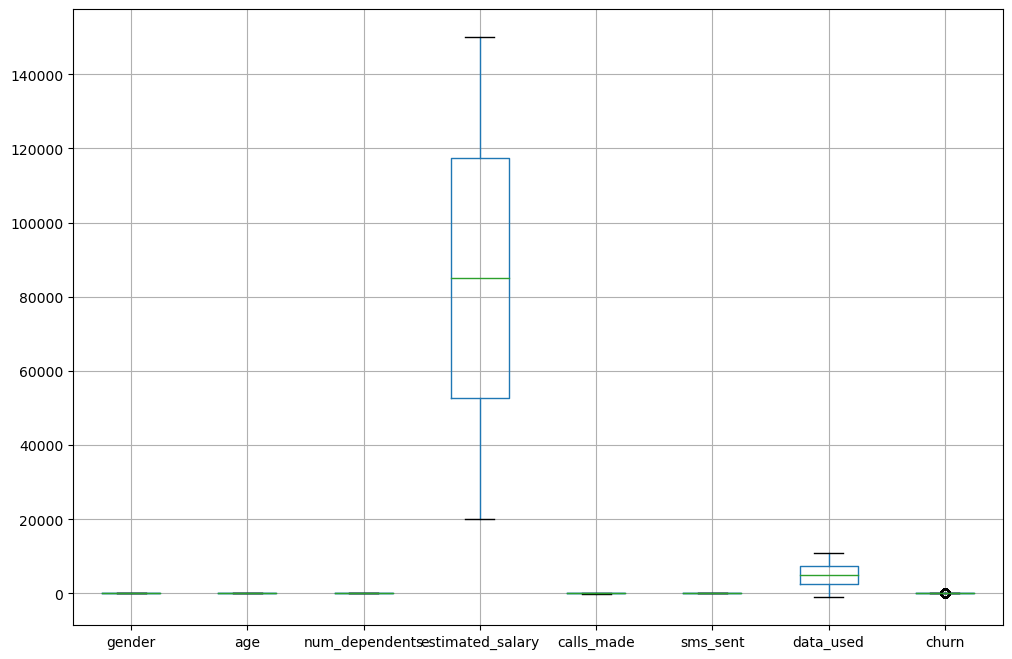

In [67]:
plt.figure(figsize=(12,8))
data.boxplot()
plt.show()

In [68]:
data.dtypes

gender              int32
age                 int64
num_dependents      int64
estimated_salary    int64
calls_made          int64
sms_sent            int64
data_used           int64
churn               int64
dtype: object

In [69]:
data['churn'].value_counts()

0    194726
1     48827
Name: churn, dtype: int64

In [70]:
X=data.drop(['churn'],axis=1)
y=data['churn']

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [72]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [73]:
data.to_csv('Cleaned_Telecom_Customer_Churn.csv')